In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import math

import plotly.express as px

import pandas_datareader.data as web

from keras.callbacks import EarlyStopping

import keras
from keras.models import load_model
from keras.preprocessing.sequence import TimeseriesGenerator
#from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.metrics import mean_squared_error

Using Theano backend.


## Get the Historical Stock Data

### Multiple Stock Data

In [2]:
from datetime import date
today = date.today()
def multiple_stock_data(ticker=None, start=None, end=None, plot=True, stock_value=None):
    
    try:
        #stock = pdr.get_data_yahoo(ticker,start,end)
        data = {}
        for stock in ticker:
            data = web.DataReader(stock,'yahoo',start,end)[stock_value]
        df_1 = pd.DataFrame(data)#.reset_index()
        if plot==True:
            df_1.plot(figsize=(12,8))
            plt.title("Stock Adjusted Price Historical Data")
            plt.xlabel('Dates')
            plt.ylabel('Stock Prices')
            plt.legend(bbox_to_anchor=(1.05,1),loc='upper left') 
        
        return df_1
     
    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'


In [3]:
# multi_stock_data = multiple_stock_data(ticker=[['PFE','JNJ','NVAX','MRNA','AZN','BNTX']], start='2017',end='today',plot=True, stock_value='Adj Close')
# multi_stock_data;

In [4]:
#multi_stock_data.to_csv('multi_pharm_data')

In [5]:
#start='2017',end='today'
multi_stocks = pd.read_csv('multi_pharm_data', parse_dates=True, index_col='Date')
#multi_stocks

In [6]:
def get_multi_plot(df, stock_value=None):
    #plt.figure(figsize=(12,8))
    df.plot(figsize=(12,8))
    label_font = {'weight':'bold','size':18}
    plt.xlabel('Date',fontdict=label_font)
    plt.ylabel('Close Price USD ($)',fontdict=label_font)
    plt.title(f'Historical {stock_value} Price',fontdict=label_font)
            #plot = go.Scatter(x=df_single.index, y=df_single['Adj Close'])
            
    return df
    

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
Date,,,,,,
2017-01-03,26.653324,104.081535,25.400000,NaN,23.886580,NaN
2017-01-04,26.887548,103.910828,26.200001,NaN,24.076221,NaN
2017-01-05,27.146002,104.998009,26.400000,NaN,24.731359,NaN
2017-01-06,27.041008,104.494850,27.400000,NaN,24.507233,NaN
2017-01-09,27.032928,104.476868,28.400000,NaN,24.593435,NaN
...,...,...,...,...,...,...
2021-02-08,34.820000,164.919998,319.929993,185.979996,50.060001,119.500000
2021-02-09,34.970001,166.270004,315.869995,179.520004,50.410000,117.529999
2021-02-10,34.740002,166.809998,298.359985,179.339996,49.970001,119.349998


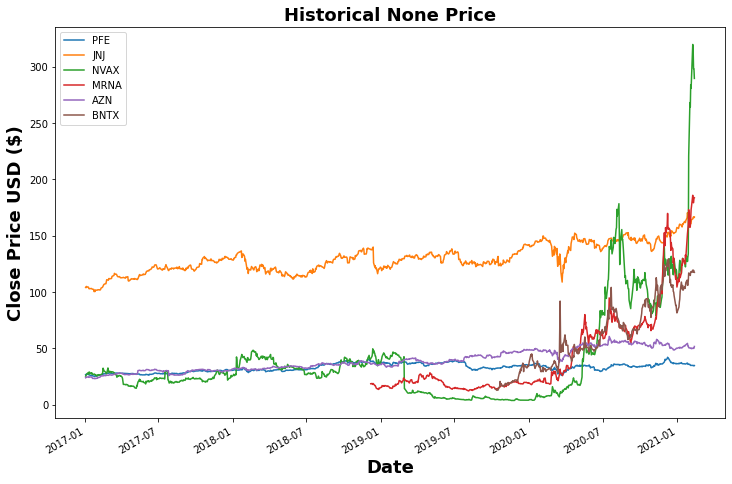

In [7]:
get_multi_plot(multi_stocks)

### Single Stock Data

In [8]:
def single_stock_data(symbol, start,end=None,plot=True,stock_value='Adj Close'):
    
    try:
        
        df = web.DataReader(symbol,'yahoo', start, end)
        df_single = pd.DataFrame(df)
        print("Dataframe has {} rows and {} columns".format(df_single.shape[0],df_single.shape[1]))
        print()
        if plot==True:
            plt.figure(figsize=(12,8))
            plt.plot(df_single[stock_value])
            label_font = {'weight':'bold','size':18}
            plt.xlabel('Date',fontdict=label_font)
            plt.ylabel('Close Price USD ($)',fontdict=label_font)
            plt.title(f'Historical {stock_value} Price for {symbol}',fontdict=label_font)
            #plot = go.Scatter(x=df_single.index, y=df_single['Adj Close'])
            
        return df_single

    except Exception as e:
        print("Error occured:", e)
        #data = 'Incorrect Symbol'


In [9]:
# start='01-01-2019'
# end='today'
# df_single = single_stock_data('PFE', start='01-01-2017',end='today',plot=True,stock_value='Adj Close')

In [10]:
single_stock = pd.read_csv('single_stock', parse_dates=True, index_col='Date')
#single_stock['Close']['2015-04-01':'2015-12-01'].plot()
single_stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,41.271347,40.455406,40.910816,41.034157,26430315.0,37.603287
2019-01-03,41.119545,39.800758,41.024670,39.886147,28503533.0,36.551258
2019-01-04,41.129032,40.094875,40.265656,40.796963,27145348.0,37.385921
2019-01-07,41.385201,40.664139,40.863377,41.015179,20995469.0,37.585892
2019-01-08,41.461102,40.939278,41.328274,41.204933,19677231.0,37.759781
...,...,...,...,...,...,...
2021-02-08,35.009998,34.740002,34.959999,34.820000,31633900.0,34.820000
2021-02-09,35.060001,34.759998,34.799999,34.970001,30170200.0,34.970001
2021-02-10,35.080002,34.700001,35.000000,34.740002,29039900.0,34.740002


## Technical Indicators
Through algorithmic trading the practice of conducting stock trades is becoming increasingly automated.  The usage of technnical indicators is a part of algorithmic trading.  This section of notebook will demonstrate how to perform a technical analysis of stock prices using Python code.  What are technical indicators and how are they relevant to stock trading?  Technical indicators are heuristic or pattern-based signals produced by the price, volume, and/or open interest of a stock which are used by traders who follow technical analysis. https://www.investopedia.com/terms/t/technicalindicator.asp<br>Technical analysts look for indicators in the historical data and use them to look for entry and exit points for trades.  In otherwords, by analyzing historical data, technical analysts can use indicators to predict future price movements and decide when to enter and exit markets.<br>
I will discuss popular technical indicators that are used in the markets to study price movements:

1. Moving Averages (MA)
2. Ease of Movement (EVM)
3. Rate of Change (ROC)

### Moving Averages
The moving average is also known s the rolling mean.  Moving averages smooth the curve by filtering out the noise inorder to highlight other components in the data such as trends and seasonality.  The moving Average smooths out the variations in the dataset by calculating the moving average.  Three common types of moving averages are Simple Moving Average (SMA), Weighted Moving Average (WMA) and Exponential Moving Average (EMA).  The commonly used moving averages are 5, 10, 20, 50, 200 day moving averages.  A 10 period SMA would be over 10 periods and woud mean 10 trading days).
<br>
#### Simple Moving Average
The Simple Moving Average is the arithmetic mean of all the stock prices or the sum of all the stock prices divided by the number of periods.  We can use the rolling method to calcualte moving averages.<br>
<br>
The below plot shows alot of fluctuations and noise in the stock price.  However, the plot shows the average stock price with the 10 and 20-year moving averages.

In [11]:
rolling_method = pd.read_csv('single_stock', parse_dates=True, index_col='Date')
#how big should the subset of data be that we're calculating the moving average on?
rolling_method['MA_10'] = rolling_method.Close.rolling(10).mean()
rolling_method['MA_20'] = rolling_method.Close.rolling(20).mean()
rolling_method

,High,Low,Open,Close,Volume,Adj Close,MA_10,MA_20
Date,,,,,,,,
2019-01-02,41.271347,40.455406,40.910816,41.034157,26430315.0,37.603287,NaN,NaN
2019-01-03,41.119545,39.800758,41.024670,39.886147,28503533.0,36.551258,NaN,NaN
2019-01-04,41.129032,40.094875,40.265656,40.796963,27145348.0,37.385921,NaN,NaN
2019-01-07,41.385201,40.664139,40.863377,41.015179,20995469.0,37.585892,NaN,NaN
2019-01-08,41.461102,40.939278,41.328274,41.204933,19677231.0,37.759781,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-02-08,35.009998,34.740002,34.959999,34.820000,31633900.0,34.820000,35.557,36.2185
2021-02-09,35.060001,34.759998,34.799999,34.970001,30170200.0,34.970001,35.323,36.0785
2021-02-10,35.080002,34.700001,35.000000,34.740002,29039900.0,34.740002,35.173,35.9565


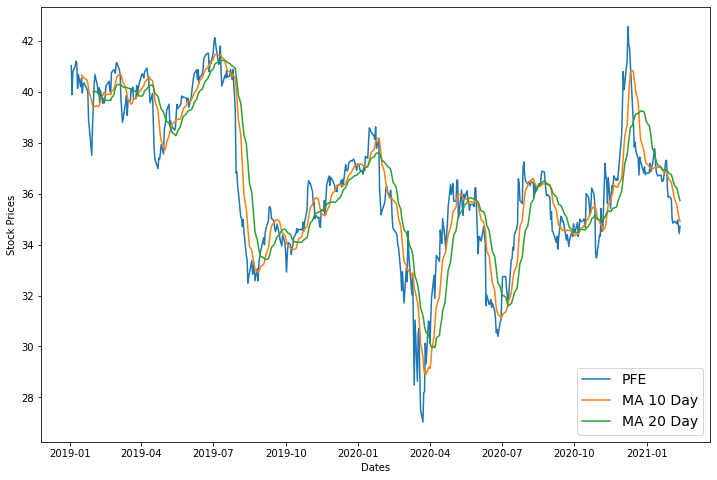

In [12]:
plt.figure(figsize=(12,8))
plt.plot(rolling_method['Close'], label='PFE')
plt.plot(rolling_method['MA_10'], label='MA 10 Day')
plt.plot(rolling_method['MA_20'],label='MA 20 Day')
plt.xlabel('Dates')
plt.ylabel('Stock Prices')
plt.legend(loc='lower right', fontsize=14)

## Rate of Change
### Historical Price Change Analysis


### Price Change in Dollars
Add column to calculate actual change in dollars<br>
To see how big the changes were on a daily basis we subtract yesterday's closing price yesterday from today.  This will show the change in price.  For example, we can see that on 1/3 the Closing price was 39.886147 and on 1/2 the Closing price was 41.034157 so the price decreased -$1.148.<br> 
Expected change (1 std deviaiton movement in price)<br>
Column of calculation of how big the actual changes was interms of standard deviations.<br>
Histograms changes in standard deviaiton<br>
Scatterplot of absolute value of magnitude change vs. actual change. Let's us see how the price changes daily.<br>

In [13]:
# sdr = multiple_stock_data(ticker=[['PFE','JNJ','NVAX','MRNA','AZN','BNTX']], start='2017',end='today',plot=False, stock_value='Adj Close')
# sdr
price_change = single_stock.copy()

In [14]:

#leavr off 1 b/c that's default value
#using shift function

price_change['Actual_Changes'] = price_change['Close'] - price_change['Close'].shift(1)
# price_change['Expected_Changes'] =price_change['Close'] * #std deviation or 21 day 
price_change

,High,Low,Open,Close,Volume,Adj Close,Actual_Changes
Date,,,,,,,
2019-01-02,41.271347,40.455406,40.910816,41.034157,26430315.0,37.603287,NaN
2019-01-03,41.119545,39.800758,41.024670,39.886147,28503533.0,36.551258,-1.148010
2019-01-04,41.129032,40.094875,40.265656,40.796963,27145348.0,37.385921,0.910816
2019-01-07,41.385201,40.664139,40.863377,41.015179,20995469.0,37.585892,0.218216
2019-01-08,41.461102,40.939278,41.328274,41.204933,19677231.0,37.759781,0.189754
...,...,...,...,...,...,...,...
2021-02-08,35.009998,34.740002,34.959999,34.820000,31633900.0,34.820000,-0.099998
2021-02-09,35.060001,34.759998,34.799999,34.970001,30170200.0,34.970001,0.150002
2021-02-10,35.080002,34.700001,35.000000,34.740002,29039900.0,34.740002,-0.230000


The below graph shows that for the stated time the stock price never increased more than 3.00 and did not decrease more than -3.00.<br>

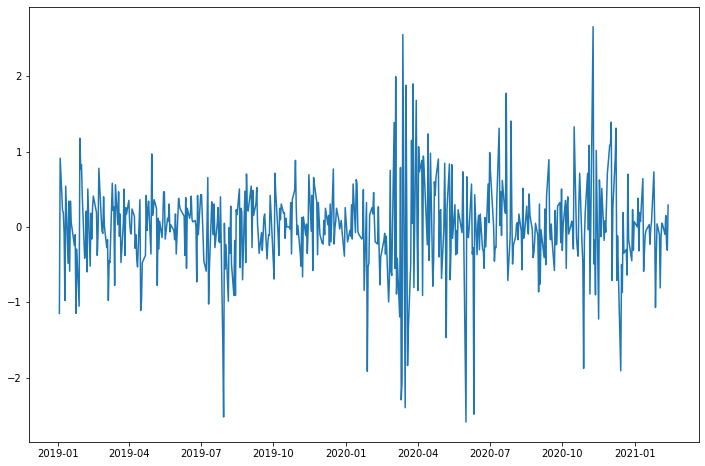

In [15]:
plt.figure(figsize=(12,8))
plt.plot(price_change['Actual_Changes'])

### Price Volatility
THe column 'change' shows how volatile the price change percentage wise.  The graph shows that the data points are now centered aound 0. The graph shows that around 3/20 was a volatile period for the stock price and it increase above 7% and decreased 7%.<br>

In [16]:
#calculate historical volatility
prct_change = price_change.copy()
prct_change['change'] = np.log(prct_change['Close'] / prct_change['Close'].shift()) #divide by previous days close

In [17]:
prct_change

,High,Low,Open,Close,Volume,Adj Close,Actual_Changes,change
Date,,,,,,,,
2019-01-02,41.271347,40.455406,40.910816,41.034157,26430315.0,37.603287,NaN,NaN
2019-01-03,41.119545,39.800758,41.024670,39.886147,28503533.0,36.551258,-1.148010,-0.028376
2019-01-04,41.129032,40.094875,40.265656,40.796963,27145348.0,37.385921,0.910816,0.022579
2019-01-07,41.385201,40.664139,40.863377,41.015179,20995469.0,37.585892,0.218216,0.005335
2019-01-08,41.461102,40.939278,41.328274,41.204933,19677231.0,37.759781,0.189754,0.004616
...,...,...,...,...,...,...,...,...
2021-02-08,35.009998,34.740002,34.959999,34.820000,31633900.0,34.820000,-0.099998,-0.002868
2021-02-09,35.060001,34.759998,34.799999,34.970001,30170200.0,34.970001,0.150002,0.004299
2021-02-10,35.080002,34.700001,35.000000,34.740002,29039900.0,34.740002,-0.230000,-0.006599


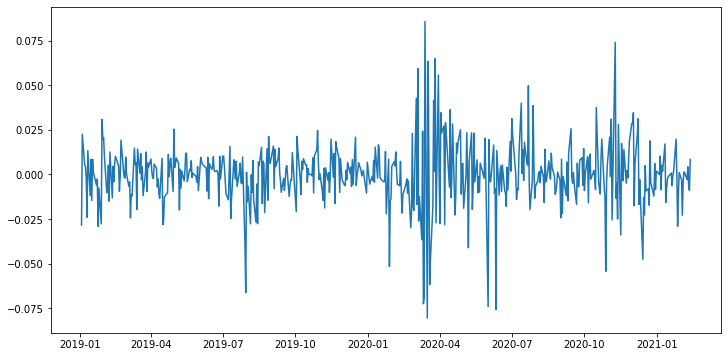

In [18]:
#graph centered around 0
#price only went up 7% twice and around 3/20 went down below 7% a few times
#8/19 went below &%
plt.figure(figsize=(12,6))
plt.plot(prct_change['change'])

### Historical Volatility

In [19]:
#use  rolling standard deviation to get that 
#use 21 day rolling window b/c there are 21 traing days in a month on average
#this will include 21st observation
#but volatility should be used from next day
prct_change['Volatility'] = prct_change['change'].rolling(21).std().shift(1)

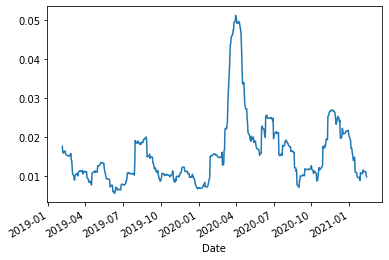

In [20]:
#what price volatility looks like over time
#4/20 was a highly volatile period
prct_change['Volatility'].plot()

In [21]:
#use rolling standard deviation to ge that. Use 21 day rolling window.
#use today's volatility at close today to predcit a 1 std move tomorrow
prct_change['Expected_Change'] = prct_change['Close'].shift(1) * prct_change['Volatility'] #1 std or 21 day rolling std
prct_change = prct_change.iloc[1:]
prct_change

,High,Low,Open,Close,Volume,Adj Close,Actual_Changes,change,Volatility,Expected_Change
Date,,,,,,,,,,
2019-01-03,41.119545,39.800758,41.024670,39.886147,28503533.0,36.551258,-1.148010,-0.028376,NaN,NaN
2019-01-04,41.129032,40.094875,40.265656,40.796963,27145348.0,37.385921,0.910816,0.022579,NaN,NaN
2019-01-07,41.385201,40.664139,40.863377,41.015179,20995469.0,37.585892,0.218216,0.005335,NaN,NaN
2019-01-08,41.461102,40.939278,41.328274,41.204933,19677231.0,37.759781,0.189754,0.004616,NaN,NaN
2019-01-09,41.432636,40.986717,41.233398,41.119545,20107580.0,37.681534,-0.085388,-0.002074,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-02-08,35.009998,34.740002,34.959999,34.820000,31633900.0,34.820000,-0.099998,-0.002868,0.011096,0.387477
2021-02-09,35.060001,34.759998,34.799999,34.970001,30170200.0,34.970001,0.150002,0.004299,0.010954,0.381417
2021-02-10,35.080002,34.700001,35.000000,34.740002,29039900.0,34.740002,-0.230000,-0.006599,0.011020,0.385365


In [22]:
#magnitude of change
#divide actual change by expected change
#end up w/values in standard deviations
prct_change['Magnitude'] = prct_change['Actual_Changes'] / prct_change['Expected_Change']

/Users/davidtorres/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(array([  3.,   4.,   8.,  23., 104., 217., 124.,  21.,   5.,   3.]),
 array([-5.34818354, -4.38031136, -3.41243918, -2.44456699, -1.47669481,
        -0.50882263,  0.45904956,  1.42692174,  2.39479392,  3.36266611,
         4.33053829]),
 <a list of 10 Patch objects>)

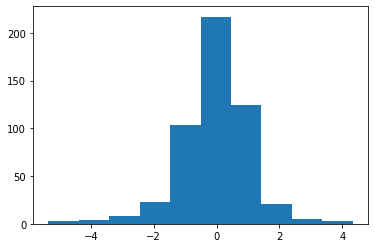

In [23]:
#idea of typical distrubution of changes in terms of standard deviation
#mostly w/in 3 stadnard deviaitons of mean
#could be more of positve change
#kind of equal happening on positve and negative side
plt.hist(prct_change['Magnitude'])

In [24]:

sdr = multi_stocks.pct_change(1)
sdr

,PFE,JNJ,NVAX,MRNA,AZN,BNTX
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.008788,-0.001640,0.031496,NaN,0.007939,NaN
2017-01-05,0.009612,0.010463,0.007634,NaN,0.027211,NaN
2017-01-06,-0.003868,-0.004792,0.037879,NaN,-0.009062,NaN
2017-01-09,-0.000299,-0.000172,0.036496,NaN,0.003517,NaN
...,...,...,...,...,...,...
2021-02-08,-0.002864,0.002858,0.102523,0.055265,0.006636,0.016416
2021-02-09,0.004308,0.008186,-0.012690,-0.034735,0.006992,-0.016485
2021-02-10,-0.006577,0.003248,-0.055434,-0.001003,-0.008728,0.015485


In [25]:
(26.887548/26.653324) - 1

0.008787796974216056

In [26]:
# #visualize stocks daily returns
# plt.figure(figsize=(12,6))
# #loop through each stock and plot simple returns
# for c in d_simple_returns.columns.values:
#     plt.plot(d_simple_returns.index, d_simple_returns[c], label=c)
# #plt.title(title)
# #plt.ylabel(col + ' Price', fontsize=18)
# plt.legend(loc='upper left', fontsize=10)
# plt.title('Volatility')
# plt.xlabel('Date')
# plt.ylabel('Daily Simple Returns')

### Average Daily Return

In [27]:
# d_simple_returns.std()
# mean_return = d_simple_returns.mean()
# print('The Daily Mean Simple Return')
# mean_return

## Forecasting
### Long Short Term Memory (LSTM)

In [28]:
#start='01-01-2019',end='today',
#df_single = single_stock_data('PFE', start='01-01-2019',end='today',plot=True,stock_value='Adj Close')

In [29]:
#df_single.to_csv('single_stock')
single_stock = pd.read_csv('single_stock', parse_dates=True, index_col='Date')
single_stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,41.271347,40.455406,40.910816,41.034157,26430315.0,37.603287
2019-01-03,41.119545,39.800758,41.024670,39.886147,28503533.0,36.551258
2019-01-04,41.129032,40.094875,40.265656,40.796963,27145348.0,37.385921
2019-01-07,41.385201,40.664139,40.863377,41.015179,20995469.0,37.585892
2019-01-08,41.461102,40.939278,41.328274,41.204933,19677231.0,37.759781
...,...,...,...,...,...,...
2021-02-08,35.009998,34.740002,34.959999,34.820000,31633900.0,34.820000
2021-02-09,35.060001,34.759998,34.799999,34.970001,30170200.0,34.970001
2021-02-10,35.080002,34.700001,35.000000,34.740002,29039900.0,34.740002


In [30]:
(24.905140 / 25.028662) -1

-0.00493522186683415

In [31]:
def delta_time_series(data,col=None):
    data['Percent_Chg'] = data[col].pct_change(1)
    #data_1 = data_1.rename(columns={"Adj Close": "Percent_Chg"})
    #return data[1:]- data[:-1]
    data = data.dropna()
    return data

In [32]:
df_chnge = delta_time_series(single_stock, col='Adj Close')
df_chnge

,High,Low,Open,Close,Volume,Adj Close,Percent_Chg
Date,,,,,,,
2019-01-03,41.119545,39.800758,41.024670,39.886147,28503533.0,36.551258,-0.027977
2019-01-04,41.129032,40.094875,40.265656,40.796963,27145348.0,37.385921,0.022835
2019-01-07,41.385201,40.664139,40.863377,41.015179,20995469.0,37.585892,0.005349
2019-01-08,41.461102,40.939278,41.328274,41.204933,19677231.0,37.759781,0.004626
2019-01-09,41.432636,40.986717,41.233398,41.119545,20107580.0,37.681534,-0.002072
...,...,...,...,...,...,...,...
2021-02-08,35.009998,34.740002,34.959999,34.820000,31633900.0,34.820000,-0.002864
2021-02-09,35.060001,34.759998,34.799999,34.970001,30170200.0,34.970001,0.004308
2021-02-10,35.080002,34.700001,35.000000,34.740002,29039900.0,34.740002,-0.006577


In [33]:
df_chnge.shape

(533, 7)

In [34]:
def plot_delta(data,col=None,symbol=None):
    plt.figure(figsize=(12,6))
    #plt.plot(delta_time_series(data))
    plt.plot(data[col])
    label_font = {'weight':'bold','size':18}
    plt.title('Daily Percentage Price Change',fontdict=label_font)
    plt.xlabel('Dates',fontdict=label_font)
    plt.ylabel('close')
    plt.show()

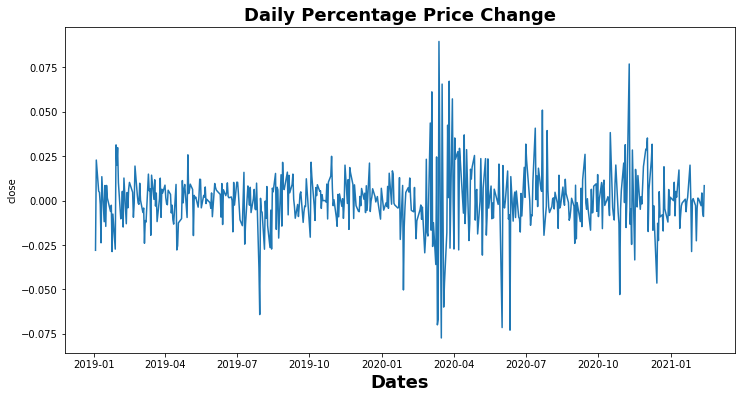

In [35]:
#simple daily return
#centered aroun d 0
plot_delta(df_chnge, col='Percent_Chg')

In [36]:
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

In [37]:
def binary_accuracy(a, b):
    '''
    Helper function to compute the match score of two 
    binary numpy arrays.
    '''
    assert len(a) == len(b)
    return (a == b).sum() / len(a)

In [38]:
df_chnge

,High,Low,Open,Close,Volume,Adj Close,Percent_Chg
Date,,,,,,,
2019-01-03,41.119545,39.800758,41.024670,39.886147,28503533.0,36.551258,-0.027977
2019-01-04,41.129032,40.094875,40.265656,40.796963,27145348.0,37.385921,0.022835
2019-01-07,41.385201,40.664139,40.863377,41.015179,20995469.0,37.585892,0.005349
2019-01-08,41.461102,40.939278,41.328274,41.204933,19677231.0,37.759781,0.004626
2019-01-09,41.432636,40.986717,41.233398,41.119545,20107580.0,37.681534,-0.002072
...,...,...,...,...,...,...,...
2021-02-08,35.009998,34.740002,34.959999,34.820000,31633900.0,34.820000,-0.002864
2021-02-09,35.060001,34.759998,34.799999,34.970001,30170200.0,34.970001,0.004308
2021-02-10,35.080002,34.700001,35.000000,34.740002,29039900.0,34.740002,-0.006577


In [39]:
single_stock = df_chnge.copy()

In [40]:
single_stock

,High,Low,Open,Close,Volume,Adj Close,Percent_Chg
Date,,,,,,,
2019-01-03,41.119545,39.800758,41.024670,39.886147,28503533.0,36.551258,-0.027977
2019-01-04,41.129032,40.094875,40.265656,40.796963,27145348.0,37.385921,0.022835
2019-01-07,41.385201,40.664139,40.863377,41.015179,20995469.0,37.585892,0.005349
2019-01-08,41.461102,40.939278,41.328274,41.204933,19677231.0,37.759781,0.004626
2019-01-09,41.432636,40.986717,41.233398,41.119545,20107580.0,37.681534,-0.002072
...,...,...,...,...,...,...,...
2021-02-08,35.009998,34.740002,34.959999,34.820000,31633900.0,34.820000,-0.002864
2021-02-09,35.060001,34.759998,34.799999,34.970001,30170200.0,34.970001,0.004308
2021-02-10,35.080002,34.700001,35.000000,34.740002,29039900.0,34.740002,-0.006577


In [41]:
train_size = int(len(single_stock) * 0.80)#0.67
test_size = len(single_stock) - train_size
#val_size = len(dataset_delta_AMAZN)  - 

In [42]:
single_stock.index[train_size]

Timestamp('2020-09-11 00:00:00')

In [43]:
single_stock.index[-test_size]


Timestamp('2020-09-11 00:00:00')

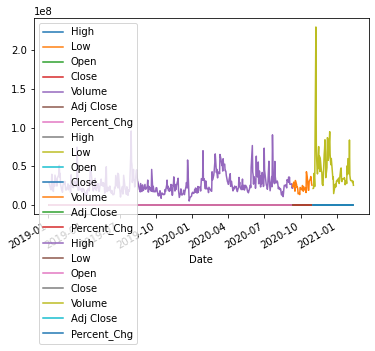

In [44]:
train = single_stock[:'2020-09-11']
val = single_stock['2020-09-11':'2020-11-01']
test = single_stock['2020-11-01':] #2021-02-12
ax = train.plot()
val.plot(ax=ax)
test.plot(ax=ax)

In [75]:
def train_test_val(single_stock, date1='2020-09-11', date2='2020-11-01'):    
    train = single_stock[:date1]#'2020-09-11'
    val = single_stock[date1:date2]
    test = single_stock[date2:] #2021-02-12
    ax = train.plot()
    val.plot(ax=ax)
    test.plot(ax=ax)
    
    return train, val, test

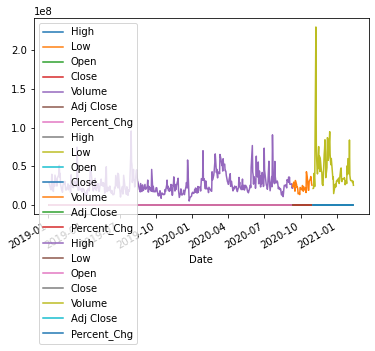

In [76]:
train, val, test= train_test_val(single_stock)

In [47]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)
val_scaled = scaler.transform(val)

In [48]:
train_scaled.shape, val_scaled.shape, test_scaled.shape

((427, 7), (36, 7), (71, 7))

In [49]:
look_back = 10
batch_size=3
col_index = {v:k for k,v in enumerate(train.columns)}
col_index

{'High': 0,
 'Low': 1,
 'Open': 2,
 'Close': 3,
 'Volume': 4,
 'Adj Close': 5,
 'Percent_Chg': 6}

In [50]:
col_index['Adj Close']


5

In [51]:
train_data_gen = TimeseriesGenerator(train_scaled, train_scaled[:,col_index['Adj Close']],
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=batch_size)

In [52]:
val_data_gen = TimeseriesGenerator(val_scaled, val_scaled[:,col_index['Adj Close']],
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=batch_size)

In [53]:
test_data_gen = TimeseriesGenerator(test_scaled, test_scaled[:,col_index['Adj Close']],
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=3)

In [54]:
ex_X, ex_y = train_data_gen[0]
ex_X.shape

(3, 10, 7)

In [55]:
sample = ex_X[0]
sample.shape

(10, 7)

In [56]:
# model = Sequential()
# model.add(LSTM(4, input_shape=(look_back, 1)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')

model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=sample.shape))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 25))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.summary()    

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 50)            11600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)               

In [57]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)
# hist = model.fit(X_train,y_train, epochs=10,batch_size=32,callbacks=[early_stop],validation_split=0.1)     
hist = model.fit_generator(train_data_gen, epochs=50,validation_data=val_data_gen,callbacks=[early_stop])

Epoch 1/50
139/139 [==============================] - 3s 19ms/step - loss: 0.0240 - val_loss: 0.0012
Epoch 2/50
139/139 [==============================] - 2s 17ms/step - loss: 0.0142 - val_loss: 0.0314
Epoch 3/50
139/139 [==============================] - 3s 19ms/step - loss: 0.0135 - val_loss: 0.0241
Epoch 4/50
139/139 [==============================] - 2s 16ms/step - loss: 0.0124 - val_loss: 1.7368e-04
Epoch 5/50
139/139 [==============================] - 2s 15ms/step - loss: 0.0117 - val_loss: 0.0029
Epoch 6/50
139/139 [==============================] - 2s 18ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 7/50
139/139 [==============================] - 3s 22ms/step - loss: 0.0093 - val_loss: 0.0056


In [58]:
model.evaluate_generator(test_data_gen)

0.012385668233036995

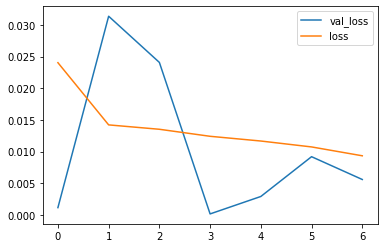

In [59]:
pd.DataFrame(hist.history).plot()

In [60]:
def save_model():
    model.save('model_parameters')
    model_params = keras.models.load_model('model_parameters')
    model_params.summary()

    return model_params

In [61]:
model_params = save_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 50)            11600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)               

In [99]:
trainPredict = model.predict_generator(train_data_gen)
trainPredict.shape

(417, 1)

In [100]:
testPredict = model.predict_generator(test_data_gen)
testPredict.shape

(61, 1)

In [103]:
# trainPredict = scaler.inverse_transform(trainPredict)
# testPredict = scaler.inverse_transform(testPredict)

In [64]:
scaler

MinMaxScaler()

In [65]:
# def invTransform(scaler, data, colName, colNames):
#     dummy = pd.DataFrame(np.zeros((len(data), len(colNames))), columns=colNames)
#     dummy[colName] = data
#     dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=colNames)
#     return dummy[colName].values

In [66]:
# invTransform(scaler, data=df, colNames=df.columns)

In [78]:
trainPredict.shape

(417, 1)

In [104]:
# # invert predictions, scale values back to real index/price range.
# trainPredict = scaler.inverse_transform(trainPredict)
# testPredict = scaler.inverse_transform(testPredict)

In [68]:
trainY = get_y_from_generator(train_data_gen)
testY = get_y_from_generator(test_data_gen)

(417, 1)
(61, 1)


In [69]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:, 0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.07 RMSE
Test Score: 0.22 RMSE


In [70]:
trainPredictPlot = np.empty_like(single_stock)
trainPredictPlot

array([[ 0.00000000e+000,  6.92870109e-310,  6.92872965e-310, ...,
         6.92870110e-310,  6.92870109e-310,  6.92870110e-310],
       [ 6.92870110e-310,  6.92874031e-310,  6.92874025e-310, ...,
         6.92874024e-310,  0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       ...,
       [-4.33046261e-311,  6.92874018e-310,  6.92870108e-310, ...,
         6.92874018e-310,  6.92870108e-310,  4.33046261e-311],
       [ 6.92874017e-310,  6.92870110e-310,  4.33046261e-311, ...,
         6.92874031e-310,  4.33046261e-311,  6.92874018e-310],
       [ 6.92870108e-310,  4.33046261e-311,  6.92874018e-310, ...,
         4.33046261e-311,  6.92874017e-310,  6.92870108e-310]])

In [89]:
single = single_stock.copy()
single = pd.DataFrame(single['Adj Close'])

In [90]:
#shift train predictions for plotting
#look_back=
trainPredictPlot = np.empty_like(single)
trainPredictPlot[:, :]= np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [93]:
trainPredict.shape, trainPredictPlot.shape

((417, 1), (533, 1))

In [72]:
testPredictPlot = np.empty_like(single_stock)
testPredictPlot

array([[ 0.00000000e+000,  6.08194810e-321,  0.00000000e+000, ...,
         1.96638127e-321,  1.22379062e-307,              nan],
       [ 2.06504564e-305,              nan,              nan, ...,
                     nan,              nan,              nan],
       [ 1.33504432e-306,  6.12454250e-302,              nan, ...,
                     nan,              nan,              nan],
       ...,
       [ 6.92872314e-310,  4.33045196e-311,  6.92872461e-310, ...,
         6.92872309e-310,  4.33045193e-311,  6.92872310e-310],
       [ 4.33045194e-311,  6.92872310e-310, -4.33045194e-311, ...,
         4.33045195e-311,  6.92872340e-310, -4.33045213e-311],
       [ 6.92872437e-310,  4.33045273e-311,  6.92872312e-310, ...,
         6.92872310e-310,  4.33045194e-311,  6.92872310e-310]])

In [73]:
testPredictPlot[:, :]= np.nan
testPredictPlot

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [79]:
trainPredictPlot.shape

(533, 7)

In [94]:
# #shift train predictions for plotting
# #look_back=
# trainPredictPlot = np.empty_like(single_stock)
# trainPredictPlot[:, :]= np.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# #shift test predictions for plotting
testPredictPlot = np.empty_like(single)
testPredictPlot[:, :]= np.nan
testPredictPlot[len(trainPredict)+(look_back * 2)+1: len(single)-1, :] = testPredict


ValueError: could not broadcast input array from shape (61,1) into shape (94,1)

In [96]:
training_data_len = int(np.round(len(single) * .8))

In [108]:
def make_prediction(model, test_scaled, testY,training_data_len):
    predictions = model.predict(test_scaled)
    prediction_unscaled = scaler.inverse_transform(predictions) #unscaling the values
    
    y_test_unscaled = scaler.inverse_transform(testY.reshape(-1,1)) #unscaling the values
    
    #this is in dollars
    rmse_predictions = np.sqrt(np.mean(prediction_unscaled -y_test_unscaled)**2)
    rmse_predictions
    
    predictions = pd.DataFrame(prediction_unscaled, columns=['Predictions'])
    
    train = dataset[:training_data_len]
    valid = dataset[training_data_len:] #data from index training_data_len to 
    
#     valid.reset_index(inplace=True)
#     valid['Prediction'] = predictions['Predictions']
#     valid1 = valid.set_index('Date')
    
#     plt.figure(figsize=(12,8))
#     plt.title('Model')
#     plt.xlabel('Label')
#     plt.ylabel('Close Price USD ($)')
#     plt.plot(train['Adj Close'])
#     #plt.plot(valid[['Close','Predictions']])
#     plt.plot(valid1['Adj Close'])
#     plt.plot(valid1['Prediction'])
#     # #valid[['Close','Predictions']].plot()
#     plt.legend(['Train','Valid','Predictions'],loc='lower right')
    return rmse_predictions, valid
    

In [109]:
make_prediction(model,test_scaled ,testY, training_data_len )

ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (71, 7)

In [ ]:
# dataset = scaler.inverse_transform(df) #dataset
# dataset.shape

In [ ]:
# # shift train predictions for plotting
# trainPredictPlot = np.empty_like(dataset)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# # Delta + previous close
# trainPredictPlot = trainPredictPlot + df_data[1:]
# set empty values
# trainPredictPlot[0:look_back, :] = np.nan
# trainPredictPlot[len(trainPredict)+look_back:, :] = np.nan

# shift train predictions for plotting
trainPredictPlot = np.empty_like(single_stock) #df
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# Delta + previous close
trainPredictPlot = trainPredictPlot + single_stock #[1:] #df

In [ ]:
testPredictPlot = np.empty_like(single_stock)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(single_stock), :] = testPredict

# Delta + previous close
testPredictPlot = testPredictPlot + single_stock[1:]
# set empty values
# testPredictPlot[0:len(trainPredict)+(look_back*2), :] = np.nan
# testPredictPlot[len(dataset):, :] = np.nan

In [ ]:
# plot baseline and predictions
plt.figure(figsize=(12,6))
plt.plot(dataset + df_data[1:])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Valid','Train','Predictions'],loc='upper left')
#plt.show()


In [ ]:
# plot baseline and predictions
plt.plot(dataset + df_data[:-1])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
def get_quote(new_df):
    #get last 60days closing values and convert datframe to an array
    last_60_days = new_df[-60:].values #converts to array
    #scale data
    last_60_days_scaled = scaler.transform(last_60_days)
    #create empty list
    x_test = []
    #append last 60 days to x_test
    x_test.append(last_60_days_scaled)
    #conert x_test to a numpy array
    x_test = np.array(x_test)
    # #reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
    #get the predicted scaled price
    pred_price = model.predict(x_test)
    #undo the scaling 
    pred_price = scaler.inverse_transform(pred_price) 
    #what model thinks predicted price will be for 12/18/2019
    #the actual prcie was $69.94
    #DAL: 58.58, 2021-1-11 40.19
    return pred_price    

In [ ]:
#get_quote(single_stock[['Adj Close']])

### Multi-Series Forecasting

In [ ]:
df_multi = multiple_stock_data(ticker=[['PFE','JNJ','NVAX','MRNA','AZN']], start='12-31-2018',end='today',plot=True, stock_value='Adj Close');
df_multi #;

In [ ]:
len(df_multi), len(dataset_delta_AMAZN)

In [ ]:
dataset_x = delta_time_series(df_multi)
dataset_x 

In [ ]:
dataset_y= delta_time_series(dataset_delta_AMAZN)
dataset_y 

In [ ]:
# normalize the dataset
scaler_multi = MinMaxScaler(feature_range=(0, 1))
scaler_multi.fit_transform(dataset_x.reshape(-1, 1))
dataset_x = scaler_multi.transform(dataset_x)
dataset_y = scaler_multi.transform(dataset_y)
# split into train and test sets
train_size = int(len(dataset_x) * 0.67)
test_size = len(dataset_x) - train_size
train_x, test_x = dataset_x[0:train_size,:], dataset_x[train_size:len(dataset_x),:]
train_y, test_y = dataset_y[0:train_size,:], dataset_y[train_size:len(dataset_y),:]

In [ ]:
train_x.shape,train_y.shape, test_x.shape, test_y.shape

In [ ]:
train_data_gen = TimeseriesGenerator(train_x, train_y,
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=3)

In [ ]:
test_data_gen = TimeseriesGenerator(test_x, test_y,
                               length=look_back, sampling_rate=1,stride=1,
                               batch_size=1)